<BR><BR>
<hr style="height:2px;border-width:0;color:black;background-color:#e7e7e7">

<div style='font-size: 22pt;font-family:Roboto;color:#264079;'><B>Marine heatwaves and cold-spell days along the Gulf of Maine, 1982-2020</B></div>

<hr style="height:2px;border-width:0;color:black;background-color:#e7e7e7">

<blockquote><div style="font-size: 18pt;font-family:Roboto;"><b>A JupyterNotebook experience by Shelby Gibson</b></div><BR><BR> 
<div style="font-size: 14pt;font-family:Roboto;"><b>EPS 109</b>: Computer Simulations with Jupyter Notebooks <BR>
Department of Earth and Planetary Science<BR>
University of California, Berkeley</div></blockquote>

<div style="text-align:justify;background-color: #FFFFFF; margin-left:5.0em;margin-right:10.0em;font-size:12pt;font-family: Roboto;"> The Gulf of Maine has recently experienced its warmest 5-year period (2015–2020) in the instrumental record. This warming was associated with a decline in the signature subarctic zooplankton species, <i>Calanus finmarchicus</i>. The temperature changes have also led to impacts on commercial species such as Atlantic cod (Gadus morhua) and American lobster <i>(Homarus americanus)</i> and protected species including Atlantic puffins <i>(Fratercula arctica)</i> and northern right whales <i>(Eubalaena glacialis)</i>. The recent period also saw a decline in Atlantic herring <i>(Clupea harengus)</i> recruitment and an increase in novel harmful algal species, although these have not been attributed to the recent warming. Here, we use an ensemble of numerical ocean models to characterize expected ocean conditions in the middle of this century. Under the high CO2 emissions scenario (RCP8.5), the average temperature in the Gulf of Maine is expected to increase 1.1°C to 2.4°C relative to the 1976–2005 average. Surface salinity is expected to decrease, leading to enhanced water column stratification. These physical changes are likely to lead to additional declines in subarctic species including <i>C. finmarchicus</i>, American lobster, and Atlantic cod and an increase in temperate species. The ecosystem changes have already impacted human communities through altered delivery of ecosystem services derived from the marine environment. Continued warming is expected to lead to a loss of heritage, changes in culture, and the necessity for adaptation. </div>

<div style="text-align:justify;background-color: #FFFFFF; margin-left:10.0em;margin-right:20.0em;font-size:7pt;font-family: Roboto;line-height:1em;">Pershing, A. et al. (2021). Climate impacts on the Gulf of Maine ecosystem: A review of observed and expected changes in 2050 from rising temperatures. Elementa: Science of the Anthropocene; 9 (1): 00076. doi: https://doi.org/10.1525/elementa.2020.00076</div>

<hr style="height:2px;border-width:0;color:black;background-color:#e7e7e7">

## Materials
#### NOAA Optimum Interpolation Sea Surface Temperature (OISST) v2.0
This high-resolution sea surface temperature (SST) analysis has a spatial grid resolution of 0.25 (1/4) degree and temporal resolution of 1 day. The product provides global fields that are based on a combination of ocean temperature observations from Advanced Very High Resolution Radiometer (AVHRR) satellite and in situ platforms (i.e., ships and buoys). The input data are irregularly distributed in space and must be first placed on a regular grid. Then, statistical methods (optimum interpolation, OI) are applied to fill in where there are missing values, resulting in a smoothed complete field. The methodology includes a bias adjustment step of the satellite data to in situ data prior to interpolation.<BR>
#### Land Mask

    NOAA High Resolution SST data provided by the NOAA/OAR/ESRL PSL, Boulder, Colorado, USA.

<BR><BR>
## Codes
    The following libraries are extremely helpful: netCDF4, xarray, Cartopy, NumPy, pandas, Matplotlib, Seaborn, hvPlot

In [1]:
import pandas as pd
import netCDF4 as nc4
import matplotlib.pyplot as plt
import xarray as xr 
from datetime import date
import numpy as np    
import seaborn as sns
from matplotlib import colors
from matplotlib import pyplot
from mpl_toolkits.basemap import Basemap
import datetime as dt
import hvplot.pandas 
import hvplot.xarray
import matplotlib.dates as mdates
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import warnings
warnings.simplefilter("ignore") # ignore serialization warning

In [2]:
def MonthToSeason(x):   
    global season
    if x == 12 or x == 1 or x == 2:
        season = "Winter"
    elif x == 3 or x == 4 or x == 5:
        season = "Spring"
    elif x == 6 or x == 7 or x == 8:
        season = "Summer"
    elif x == 9 or x == 10 or x == 11:
        season = "Fall" 
    return season

<BR><BR>
## Methodology
### Step 1) Narrow down data 
1. Combine SST data with a land_sea mask, screening out land data 
2. Selecting region of interest (38N-46N, 108W-118W)
3. Filtering for whole years (only partial data available for 1981 and 2021)

In [3]:
# Combining SST data with a land_sea mask, screening out land data
## These are the CDO commands in Ubuntu: 
### cdo setmissval,0 -mul /Downloads/sst.nc /Downloads/lsmask.nc /Downloads/output.nc
sst_lsmask = xr.open_dataset('/output.nc') 

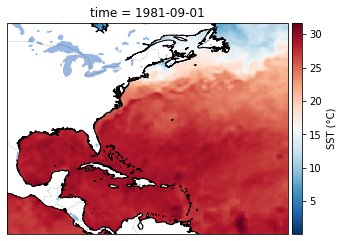

In [4]:
# Plotting the first index; we will need to narrow down the region or else deal with a massive amount of data 
ax = plt.axes(projection=ccrs.PlateCarree())
sst_lsmask.sst[0].plot.pcolormesh(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree(), x="lon", y="lat", 
                                  add_colorbar=True, cbar_kwargs={"shrink": 0.97, "pad": 0.01, "label": 'SST (°C)'})
ax.coastlines('10m')
ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', linewidth=0.3)
ax.set_xlim([-99.875, -40.125])
ax.set_ylim([8.125, 52.875])
plt.show()

In [5]:
# Selecting (38N-46N, 108W-118W) to narrow down region 
## These are the CDO commands in Ubuntu:
### cdo sellonlatbox,288,298,38,46 /Downloads/input.nc /Downloads/output2.nc
cdo_gom = xr.open_dataset('/output2.nc') 

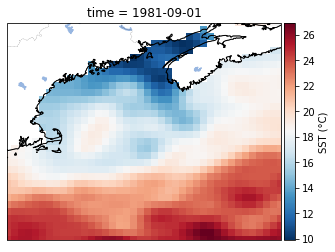

In [6]:
# Plotting the first index to see the narrowed-down region
ax = plt.axes(projection=ccrs.PlateCarree())
cdo_gom.sst[0].plot.pcolormesh(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree(), x="lon", y="lat", 
                               add_colorbar=True, cbar_kwargs={"shrink": 1, "pad": 0.01, "label": 'SST (°C)'})
ax.coastlines('10m')
ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', linewidth=0.3)
ax.set_xlim([-71.875, -62.125])
ax.set_ylim([38.125, 45.875])
plt.show()

In [7]:
# Selecting whole years, since 1981 and 2021 only have partial data
sel_dates = cdo_gom.time.values[(cdo_gom.time.dt.year > 1981) & (cdo_gom.time.dt.year < 2021)]
cdo_gom = cdo_gom.sel(time=sel_dates)

In [8]:
# SSTs for Gulf of Maine, 1982-2020; hvplot allows for cool, interactive plots!
cdo_gom.hvplot.heatmap(x='lon', y='lat', C='sst', height=400, width=600, cmap='RdBu_r', clabel='SST (°C)', 
                       xlabel='Longitude', ylabel='Latitude', widget_type="scrubber", widget_location="bottom")

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=14244, width=550)
        [2] HSpacer()

<BR><BR>
### Step 2)  Compute climatology 
1. Compute climatology by averaging SST data (at every grid point for every day of every year)
2. Remove the SST climatology from the NOAA OI SST to obtain SST anomalies (SSTAs)

In [9]:
# Climatology typically requires 30+ years of data; we have 38 years available here
climatology = cdo_gom.groupby('time.dayofyear').mean('time', skipna=True, keep_attrs=True) 
SSTA = cdo_gom.groupby('time.dayofyear') - climatology

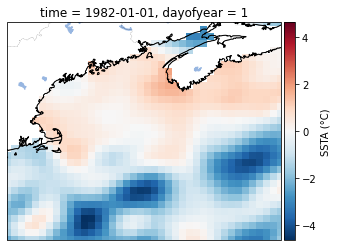

In [10]:
# Plotting the first index to see; notice the colorbar range change from SSTs to SSTAs! SSTAs are deviations from SSTs
ax = plt.axes(projection=ccrs.PlateCarree())
SSTA.sst[0].plot.pcolormesh(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree(), x="lon", y="lat", 
                            add_colorbar=True, cbar_kwargs={"shrink": 1, "pad": 0.01, "label": 'SSTA (°C)'})
ax.coastlines('10m')
ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', linewidth=0.3)
ax.set_xlim([-71.875, -62.125])
ax.set_ylim([38.125, 45.875])
plt.show()

In [11]:
# Resulting SSTAs for Gulf of Maine, 1982-2020; hvplot allows for cool, interactive plots!
SSTA.hvplot.heatmap(x='lon', y='lat', C='sst', height=400, width=600, cmap='RdBu_r', clabel='SSTA (°C)', 
                    xlabel='Longitude', ylabel='Latitude', widget_type="scrubber", widget_location="bottom")

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=14244, width=550)
        [2] HSpacer()

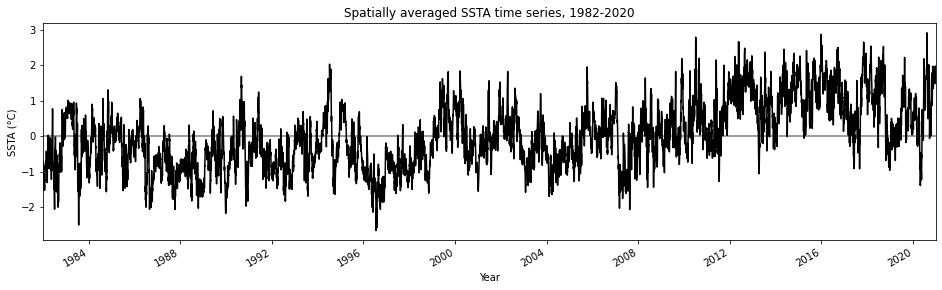

In [12]:
# Plotting a time series to show the trend of SSTAs from 1982-2020; look at that uptick since ~2008!
SSTA.sst.groupby('time').mean(['lat', 'lon']).plot(figsize=(16,4), color='black')
plt.ylabel('SSTA (°C)')
plt.xlabel('Year')
plt.axhline(0, color='gray', zorder=0)
plt.xlim(dt.datetime(1982, 1, 1), dt.datetime(2020, 12, 31))
plt.title('Spatially averaged SSTA time series, 1982-2020') 
plt.show()

<BR><BR>
### Step 2)  Compute 90% and 10% thresholds <BR>
1. Collect all SSTs at all grid points in the study region where mask=1
2. Use a sorting routine to sort these values from the lowest to highest
3. Find the SST values at 90% and at 10% (2 values)

In [13]:
# This collects all data for each month and sorts it to determine 90th & 10th percentile values for the region
monthly_data = pd.DataFrame([])
for monthinteger in np.arange(1,13):
    month = cdo_gom.sel(time=np.isin(cdo_gom.time.dt.month, monthinteger))
    mon_climatology = month.groupby('time.day').mean('time', skipna=True, keep_attrs=True) 
    mon_sst = (month.groupby('time.day') - mon_climatology).rename({'sst': 'ssta'})
    
    monthly_data = monthly_data.append(pd.DataFrame({'Month' : monthinteger,  
                                                     '90th' : float(mon_sst.ssta.quantile(.9)), 
                                                     '10th' : float(mon_sst.ssta.quantile(.1)),                                                    
                                                    }, index=[' ']))
monthly_data

Month      90th      10th
       1  1.913333 -1.820255
       2  1.875386 -1.801538
       3  1.920000 -1.868462
       4  1.915898 -1.872564
       5  2.072308 -2.015899
       6  1.977694 -1.925129
       7  1.864870 -1.844103
       8  1.795132 -1.756153
       9  1.890512 -1.832823
      10  1.879486 -1.835896
      11  1.827181 -1.800770
      12  1.932307 -1.859998

In [14]:
# Turning SSTA data into a pandas dataframe and filtering it to display what will be useful
daily_df = SSTA.to_dataframe().reset_index().sort_values(by=['lat', 'lon'])
daily_df['Month'] = pd.DatetimeIndex(daily_df['time']).month
daily_df['Year'] = pd.DatetimeIndex(daily_df['time']).year
daily_df.rename(columns = {'sst':'SSTA', 'time':'Time', 'lat':'Lat', 'lon':'Lon', 'dayofyear':'Day of year'}, inplace = True)
daily_df = daily_df.dropna()
daily_df.head(5)

Lat      Lon       Time  Day of year      SSTA  Month  Year
0  38.125  288.125 1982-01-01            1 -2.302305      1  1982
1  38.125  288.125 1982-01-02            2 -1.641282      1  1982
2  38.125  288.125 1982-01-03            3 -0.793590      1  1982
3  38.125  288.125 1982-01-04            4 -0.556667      1  1982
4  38.125  288.125 1982-01-05            5 -1.311794      1  1982

In [15]:
# Merging daily_df with monthly_data, then assigning 1's for SSTAs > 90th percentile and -1's for SSTAs < 10th percentile
master_df = daily_df.merge(monthly_data, on="Month", how ='inner')
master_df['Threshold'] = np.where(master_df['SSTA'] < master_df['10th'], -1, np.where(master_df['SSTA'] > master_df['90th'], 1, 0))
master_df['Year'] = pd.DatetimeIndex(master_df['Time']).year
master_df = master_df.dropna().drop(columns=['Time', '10th', '90th'])
master_df = master_df[['Lat', 'Lon', 'Day of year', 'Month', 'Year', 'SSTA', 'Threshold']]
master_df.head(5)

Lat      Lon  Day of year  Month  Year      SSTA  Threshold
0  38.125  288.125            1      1  1982 -2.302305         -1
1  38.125  288.125            2      1  1982 -1.641282          0
2  38.125  288.125            3      1  1982 -0.793590          0
3  38.125  288.125            4      1  1982 -0.556667          0
4  38.125  288.125            5      1  1982 -1.311794          0

<BR><BR>
### Step 4)  At all grid points, compute # of heatwave days and # of cold spell days
1. A heatwave day (+ SSTA day): SSTA > 90% threshold SSTA
2. A cold spell day (- SSTA day): SSTA < 10% threshold SSTA

In [16]:
# Example of how the for-loop works 
one_point = master_df.loc[(master_df['Lat'] == 45.875) & (master_df['Lon'] == 297.875)]    # going point by point
one_year = one_point.loc[(one_point['Year'] == 2020)]                                      # going year by year
one_year = one_year.sort_values(by='Day of year').groupby('Day of year').head()            # chronologically sorting
one_month = one_year.loc[(one_year['Month'] == 12)]                                        # going month by month
heatdays = len(one_month.loc[one_month.Threshold == 1])                                    # counting SSTAs > 90th as +1
colddays = len(one_month.loc[one_month.Threshold == -1])                                   # counting SSTAs < 10th as -1

In [17]:
## This is the for-loop; it takes a while to run (smaller the region = fewer data = faster runtime)
# month_events = pd.DataFrame([])
# for iii in cdo_gom.lat.values:
#     for jjj in cdo_gom.lon.values:
#         one_point = master_df.loc[(master_df['Lat'] == iii) & (master_df['Lon'] == jjj)]
#         for yyyy in np.arange(1982,2021):
#             one_year = one_point.loc[(one_point['Year'] == yyyy)]
#             one_year = one_year.sort_values(by='Day of year').groupby('Day of year').head()
#             for mmm in np.arange(1,13):
#                 one_month = one_year.loc[(one_year['Month'] == mmm)]
#                 heatdays = len(one_month.loc[one_month.Threshold == 1])
#                 colddays = len(one_month.loc[one_month.Threshold == -1])

#                 month_events = month_events.append(pd.DataFrame({'Lat' : iii, 
#                                                         'Lon' : jjj, 
#                                                         'Year' : yyyy,
#                                                         'Month' : mmm,
#                                                         '#MHW days' : heatdays,
#                                                         '#CS days' : colddays,}, index=[0]), ignore_index = True)

In [19]:
# Since the above code takes ~1 hour to run, I saved it to a .CSV for convenience 
month_events = pd.read_csv('/month_events.csv')
month_events['Season'] = month_events['Month'].apply(lambda x : MonthToSeason(x)) # categorizing seasons from months
month_events.head(5)

Lat      Lon  Year  Month  #MHW days  #CS days  Season
0  38.125  288.125  1982      1          0        22  Winter
1  38.125  288.125  1982      2          4         1  Winter
2  38.125  288.125  1982      3          3         0  Spring
3  38.125  288.125  1982      4          0         7  Spring
4  38.125  288.125  1982      5          0         4  Spring

<BR><BR>
### Step 5)  Trends over time <BR>
1. Over the years?
2. Over the seasons?

In [20]:
meanhw = month_events.pivot_table(index='Lat', columns='Lon', values='#MHW days', aggfunc=np.mean).values # average +SSTAs
meancs = month_events.pivot_table(index='Lat', columns='Lon', values='#CS days', aggfunc=np.mean).values # average -SSTAs
X_unique = month_events.Lat.unique()
Y_unique = month_events.Lon.unique()
X, Y = np.meshgrid(Y_unique, X_unique)

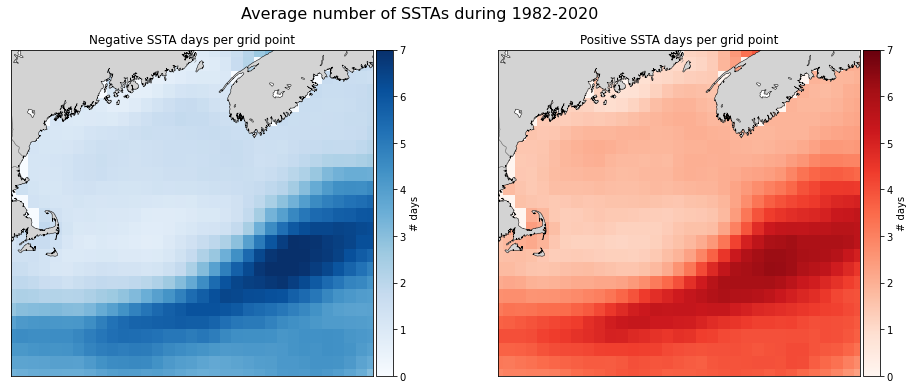

In [21]:
fig = plt.figure(figsize=(16,6))
plt.suptitle('Average number of SSTAs during 1982-2020', fontsize=16)
ax1_j = fig.add_subplot(121)
map1 = Basemap(llcrnrlon=289, llcrnrlat=39, urcrnrlon=297, urcrnrlat=45, projection='mill', resolution='h')
a1 = map1.pcolormesh(X, Y, meancs, latlon=True, cmap='Blues', vmin=0.0, vmax=7.0)
map1.drawcoastlines(linewidth=0.5)
map1.fillcontinents(color='lightgray')
map1.drawstates(linewidth=0.5, color='gray')
plt.colorbar(a1, ax=ax1_j, fraction=0.0428, pad=0.009, spacing='uniform', label='# days')
plt.title('Negative SSTA days per grid point')
ax2_j = fig.add_subplot(122)
map2 = Basemap(llcrnrlon=289, llcrnrlat=39, urcrnrlon=297, urcrnrlat=45, projection='mill', resolution='h')
a2 = map2.pcolormesh(X, Y, meanhw, latlon=True, cmap='Reds', vmin=0.0, vmax=7.0)
map1.drawcoastlines(linewidth=0.5)
map1.fillcontinents(color='lightgray')
map1.drawstates(linewidth=0.5, color='gray')
plt.colorbar(a2, ax=ax2_j, fraction=0.0428, pad=0.009, spacing='uniform', label='# days')
plt.title('Positive SSTA days per grid point')
plt.show()

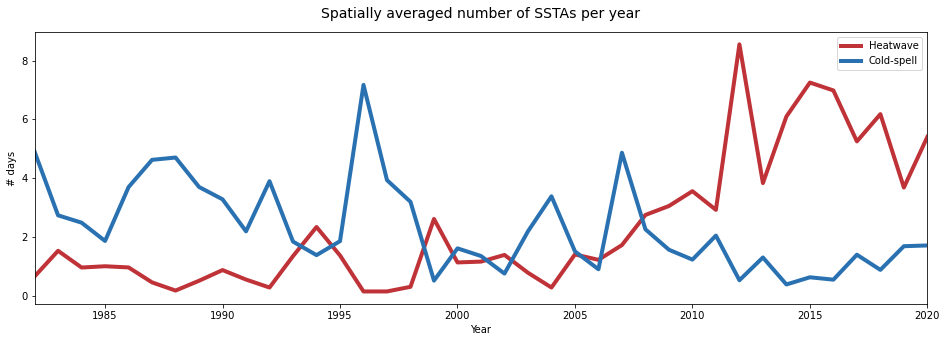

In [22]:
year_avg = month_events.groupby(['Year']).mean().reset_index() # Average over all points over all years
plt.figure(figsize=(16,5))
year_plot = sns.lineplot(data=year_avg, x='Year', y='#MHW days', lw=4, label='Heatwave', color='#bf3237')
year_plot = sns.lineplot(data=year_avg, x='Year', y='#CS days', lw=4, label='Cold-spell', color='#2971b1')
year_plot.set_xlim(1982, 2020)
plt.title('Spatially averaged number of SSTAs per year', size=14, pad=14)
plt.ylabel('# days')
plt.legend()
plt.show()

In [23]:
## This loops through every year (for both events), saves them as .PNGs, then creates a .GIF 

# for yyyy in np.arange(1982, 2021):
#     year = month_events.loc[(month_events['Year'] == yyyy)]
#     meancs = year.pivot_table(index='Lat', columns='Lon', values='#CS days', aggfunc=np.mean).values
#     meanhw = year.pivot_table(index='Lat', columns='Lon', values='#MHW days', aggfunc=np.mean).values
#     X_unique = year.Lat.unique()
#     Y_unique = year.Lon.unique()
#     X, Y = np.meshgrid(Y_unique, X_unique)
    
#     fig = plt.figure(figsize=(12,6))
#     ax1_j = fig.add_subplot(121)
#     map1 = Basemap(llcrnrlon=289, llcrnrlat=39, urcrnrlon=297, urcrnrlat=45, projection='mill', resolution='h')
#     a1 = map1.pcolormesh(X, Y, meancs, latlon=True, cmap='Blues', vmin=0.0, vmax=7.0)
#     map1.drawcoastlines(linewidth=0.5)
#     map1.fillcontinents(color='lightgray')
#     map1.drawstates(linewidth=0.5, color='gray')
#     plt.title('Gulf of Maine negative SSTAs, %s' % yyyy, size=14, pad=14)
#     plt.colorbar(a1, ax=ax1_j, fraction=0.04275, pad=0.009, spacing='uniform', label='# days')
    
#     ax2_j = fig.add_subplot(122)
#     map1 = Basemap(llcrnrlon=289, llcrnrlat=39, urcrnrlon=297, urcrnrlat=45, projection='mill', resolution='h')
#     a2 = map1.pcolormesh(X, Y, meanhw, latlon=True, cmap='Reds', vmin=0.0, vmax=7.0)
#     map1.drawcoastlines(linewidth=0.5)
#     map1.fillcontinents(color='lightgray')
#     map1.drawstates(linewidth=0.5, color='gray')
#     plt.colorbar(a2, ax=ax2_j, fraction=0.04275, pad=0.009, spacing='uniform', label='# days')
#     plt.title('Gulf of Maine positive SSTAs, %s' % yyyy, size=14, pad=14)
#     plt.savefig('plot'+str(yyyy)+'.png')
#     plt.show()
# from PIL import Image
# import glob
# # Stacking the .PNGs from the above code into a looping .GIF
# frames = []
# imgs = glob.glob("*.png")
# for i in imgs:
#     new_frame = Image.open(i)
#     frames.append(new_frame)
# # Save into a GIF file that loops forever
# frames[0].save('png_to_gif.gif', format='GIF', append_images=frames[1:], save_all=True, duration=1140, loop=0)

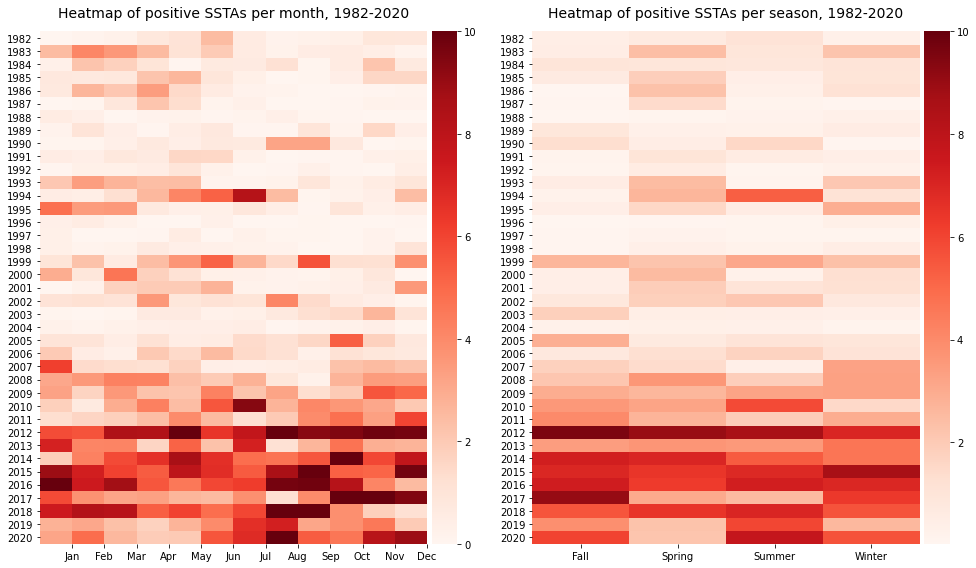

In [24]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
a = month_events.pivot_table(index='Year', columns='Month', values='#MHW days', aggfunc='mean')
sns.heatmap(a, vmax=10, cmap="Reds", cbar_kws={"pad": 0.01})
month_starts = np.arange(1,13)
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
plt.title('Heatmap of positive SSTAs per month, 1982-2020', size=14, pad=14)
ax2 = fig.add_subplot(122)
a2 = month_events.pivot_table(index='Year', columns='Season', values='#MHW days', aggfunc='mean')
sns.heatmap(a2, vmax=10, cmap="Reds", cbar_kws={"pad": 0.01})
plt.title('Heatmap of positive SSTAs per season, 1982-2020', size=14, pad=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
fig.tight_layout()
plt.show()

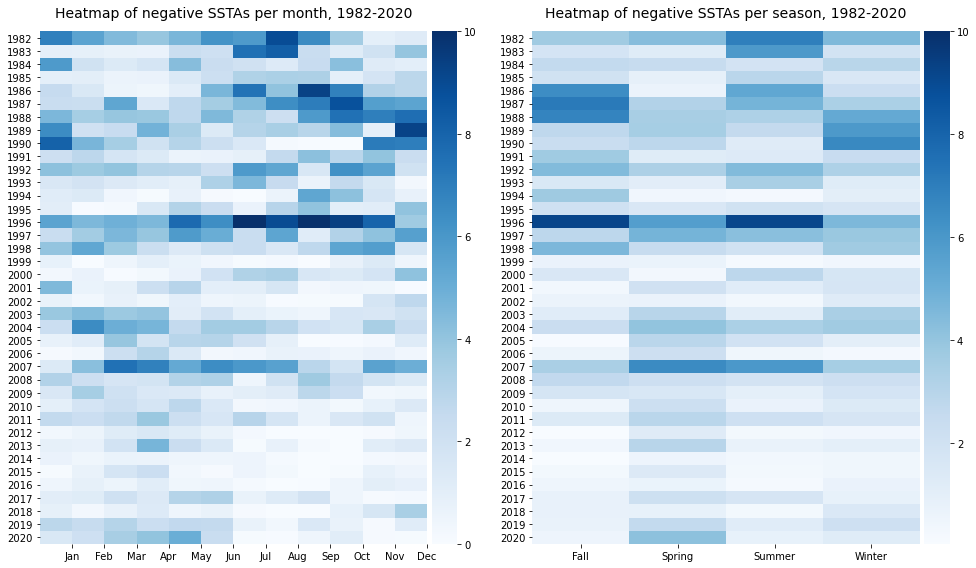

In [25]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
a = month_events.pivot_table(index='Year', columns='Month', values='#CS days', aggfunc='mean')
sns.heatmap(a, vmax=10, cmap="Blues", cbar_kws={"pad": 0.01})
month_starts = np.arange(1,13)
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
plt.title('Heatmap of negative SSTAs per month, 1982-2020', size=14, pad=14)
ax2 = fig.add_subplot(122)
a2 = month_events.pivot_table(index='Year', columns='Season', values='#CS days', aggfunc='mean')
sns.heatmap(a2, vmax=10, cmap="Blues", cbar_kws={"pad": 0.01})
plt.title('Heatmap of negative SSTAs per season, 1982-2020', size=14, pad=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
fig.tight_layout()
plt.show()

<BR><BR><hr style="height:2px;border-width:0;color:black;background-color:#e7e7e7">

<div style="text-align:justify;background-color: #FFFFFF; margin-left:5.0em;margin-right:10.0em;font-size:12pt;font-family: Roboto;">The ecosystems in the Gulf of Maine have provided food, recreation, and economic opportunities for centuries. Recently, the Gulf of Maine has experienced one of the fastest rates of warming of any ocean ecosystem. Global climate projections suggest that this region will continue to warm at an above average rate. The recent warming has elevated concerns within the region about how marine resources and communities around the Gulf of Maine will fare as global warming progresses.</div>

<hr style="height:2px;border-width:0;color:black;background-color:#e7e7e7"><BR><BR>